In [0]:
from google.colab import files
uploaded = files.upload()

Saving pm2.5_non_normalised.csv to pm2.5_non_normalised.csv


In [0]:
from pandas import DataFrame
import pandas

# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pandas.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

n_step = 8

dataset = read_csv('pm2.5_non_normalised.csv', header=0, index_col=0)
#print(dataset)
dataset = series_to_supervised(dataset, n_step, 1)
values = dataset.values
#print(values)


n_train_hours = 365 * 24 * 4
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

print(train.shape)
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 8, 1))
test_X = test_X.reshape((test_X.shape[0], 8, 1))

print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 51)
(35040, 50, 1) (35040,) (8709, 50, 1) (8709,)


No handles with labels found to put in legend.


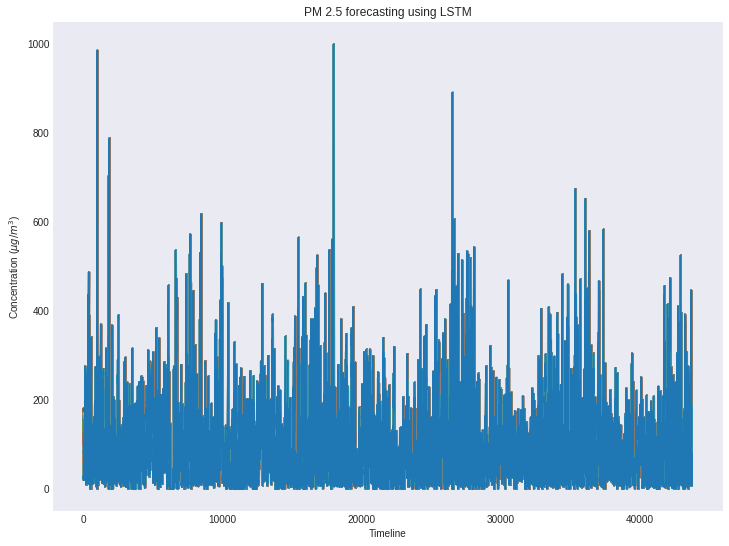

In [0]:
import matplotlib.pyplot as plt

plt.plot(values)



plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using LSTM")

plt.show()

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation, Dropout

# Network
model = Sequential()
train

model.add(LSTM(
    input_dim=1,
    output_dim=50,
    return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(
    100,
    return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(
    output_dim=1))
model.add(Activation('linear'))
model.compile(loss='mae', optimizer='adam')

# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=100, validation_data=(test_X, test_y), verbose=2, shuffle=False)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, input_shape=(None, 1), units=50)`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=1)`


Train on 35040 samples, validate on 8709 samples
Epoch 1/100
 - 52s - loss: 76.7701 - val_loss: 71.7160
Epoch 2/100
 - 50s - loss: 58.8342 - val_loss: 52.8546
Epoch 3/100
 - 50s - loss: 46.8686 - val_loss: 43.1528
Epoch 4/100
 - 50s - loss: 39.4941 - val_loss: 37.0024
Epoch 5/100
 - 50s - loss: 34.5016 - val_loss: 32.6986
Epoch 6/100
 - 50s - loss: 30.6973 - val_loss: 29.4776
Epoch 7/100
 - 49s - loss: 28.0150 - val_loss: 27.2101
Epoch 8/100
 - 50s - loss: 25.9124 - val_loss: 25.6004
Epoch 9/100
 - 50s - loss: 24.4466 - val_loss: 23.7547
Epoch 10/100
 - 50s - loss: 23.1706 - val_loss: 22.7009
Epoch 11/100
 - 50s - loss: 21.9737 - val_loss: 21.3461
Epoch 12/100
 - 50s - loss: 21.1896 - val_loss: 20.6988
Epoch 13/100
 - 49s - loss: 20.3416 - val_loss: 19.9085
Epoch 14/100
 - 50s - loss: 19.7160 - val_loss: 19.6474
Epoch 15/100
 - 50s - loss: 19.3173 - val_loss: 18.6062
Epoch 16/100
 - 50s - loss: 18.8200 - val_loss: 18.0034
Epoch 17/100
 - 50s - loss: 18.4014 - val_loss: 17.8797
Epoch 18

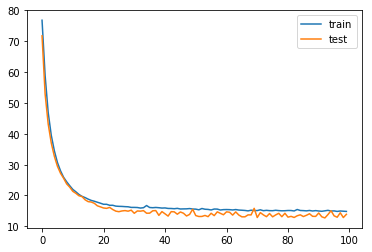

In [0]:
# plot history
from matplotlib import pyplot

pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [0]:
from math import sqrt
from numpy import concatenate
#from numpy import scaler
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error

# # make a prediction
# print(test_X.shape)
# # test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# yhat = model.predict(test_X)
# test_X = test_X.reshape((test_X.shape[0], test_X.shape[1]))
# # invert scaling for forecast
# scaler = StandardScaler()
# scaler.fit(test_X)
# inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
# inv_yhat = scaler.inverse_transform(inv_yhat)
# inv_yhat = inv_yhat[:,0]
# # invert scaling for actual
# test_y = test_y.reshape((len(test_y), 1))
# inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
# inv_y = scaler.inverse_transform(inv_y)
# inv_y = inv_y[:,0]
# # calculate RMSE
# rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
# print(rmse)

# print(test_y)
# print(yhat)

In [0]:
test_X = test_X.reshape((test_X.shape[0], 50, 1))
yhat = model.predict(test_X)
print(test_y)
print(yhat)

rms =mean_squared_error(yhat, test_y)
print(rms)

[146.88128   34.20523   34.20523  ...  10.060362  10.060362   8.048289]
[[206.18762 ]
 [130.26462 ]
 [ 25.335196]
 ...
 [  8.751385]
 [ 10.453549]
 [ 10.462611]]
779.8551357686102


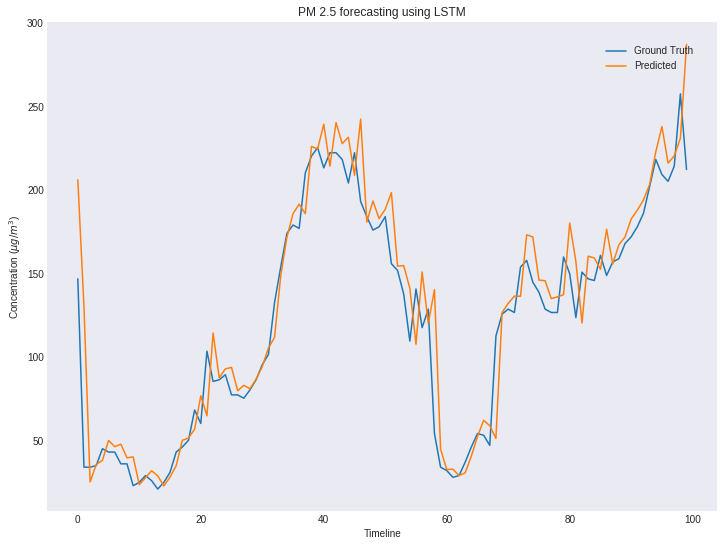

In [0]:
import matplotlib.pyplot as plt

plt.plot(test_y[:100], label="Ground Truth")
plt.plot( yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using LSTM")

plt.show()

In [0]:
import matplotlib.pyplot as plt

plt.plot(train_X, label="Ground Truth")
# plt.plot( yhat[:100], label="Predicted")


plt.style.use('seaborn-dark')
plt.ylabel("Concentration ($\mu g / m^3$)")
plt.xlabel("Timeline")
plt.legend(loc="upper right", borderaxespad=2)
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 12
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.title("PM 2.5 forecasting using LSTM")

plt.show()